In [75]:
url = 'https://www.liberation.fr/apps/2018/02/meurtres-conjugaux-derriere-les-chiffres/static/data.csv'

In [76]:
import requests

user_agent = {'User-Agent': "Mozilla/5.0 (X11; CrOS x86_64 13099.62.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.83 Safari/537.36",
             'Referer': 'https://www.liberation.fr/apps/2018/02/meurtres-conjugaux-derriere-les-chiffres/'}


  
r = requests.get(url, 
                headers=user_agent)

In [4]:
r

<Response [200]>

In [77]:
with open('femicides2.csv','w') as fp:
    fp.write(r.text)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np 

In [78]:
df = pd.read_csv('femicides2.csv')

In [79]:
len(df)

389

In [80]:
txt = '\n'.join(df.dropna(subset=['circonstances'])['circonstances'])
txt[1000:2000]

"pÃ©e avec une casserole par son mari malade\netranglÃ©e alors qu'elle venait rÃ©cupÃ©rer des affaires\nfrappÃ©e Ã\xa0 plusieurs reprises au visage et Ã\xa0 la tÃªte par son ex qui avait dÃ©jÃ\xa0 Ã©tÃ© condamnÃ© pour des violences\nRenversÃ©e en voiture par son ex alors qu'elle Ã©tait avec son compagnon\nabattue dâ\x80\x99un tir de fusil de chasse dans la cour de lâ\x80\x99exploitation agricole oÃ¹ elle travaillait\npoignardÃ©e chez elle   \npoignardÃ©e dans son lit \nbattue Ã\xa0 mort chez elle\n24 coups de couteau, principalement au visage et dans le cou dans sa cuisine / divorce en cours / antÃ©cÃ©dents violences\n45 coups de couteau, principalement Ã\xa0 lâ\x80\x99abdomen / Â«adulte protÃ©gÃ©eÂ», rencontre Ã\xa0 l'HP / alcool\npoignardÃ©e Ã\xa0 11 reprises dans lâ\x80\x99abdomen en voiture / compagnon connu pour violences\ntuÃ©e avec une arme de poing par son mari qui souffrait d'un cancer et s'est ensuite suicidÃ©\nabattue devant chez elle de deux balles\ntouchÃ©e par un tir dans

In [92]:
import re

px = re.compile('Ã.')

set(px.findall(txt))

trans = {'Ã\xa0' : 'à', 'Ã¢' : '', 
 'Ã§' : 'ç',
 'Ã¨' : 'è', 'Ã©' : 'é', 'Ãª' : 'ê', 'Ã«' : 'e',
  'Ã´' : 'ô',
 'â\x80\x99' : "'", 'Â«' : '"', 'Â»' : '"',
 'Ã®' : 'î', 'Ã»' : 'û',  'Ã¹' : 'ù'
}

def clean_txt(txt):
    tt = txt[:]
    for x, y in trans.items():
        tt = tt.replace(x,y)
    return tt

#print(tt)

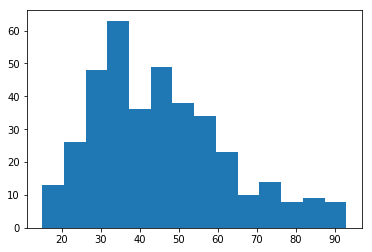

In [83]:
import re

pp = re.compile('\d+')
ages = [int(x) for x in pp.findall( ' '.join(df['age']))]

plt.hist( ages, bins = 14);

In [87]:
set([ x.lower().strip() for x in df['mois'].values ]) 

df['mois'] = np.array([month2num[x.lower().strip()] 
                       for x in df['mois'].values])

In [86]:
month2num = {'aoã»t' : 8,
 'avril' : 4,
 'dã©cembre' : 12,
 'fã©vrier': 2,
 'janvier' : 1,
 'juillet' : 7,
 'juin' : 6,
 'mai' : 5,
 'mars' : 3,
 'novembre' : 11,
 'octobre' : 10,
 'septembre' : 9}

In [88]:
dd = {}

for yy in range(2017,2021):
    dd[yy] = [len( df[(df['annee'] == yy) & (df['mois'] == k)])
              for k in range(1, 7) ]

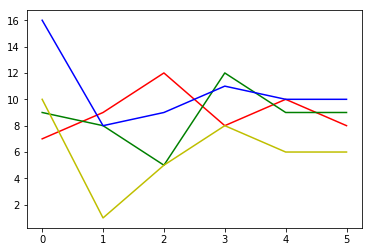

In [89]:
cc = [c for c in 'rgby']

for yy in range(2017,2021):
    plt.plot(dd[yy], cc.pop(0) + '-')

In [90]:
ddf = df[df['age'] != '?']

In [99]:
 mask = (30 < ddf['age'].astype(int))  &  (ddf['age'].astype(int) < 35)
    
print( clean_txt( '\n'.join(ddf[mask]['mode opÃ©ratoire']) ) )

Strangulation
Arme blanche
Ecrasée par un train
Strangulation
Asphyxie
Strangulation
Arme blanche
Arme à feu
Arme blanche
Brulée 
Arme blanche
Arme à feu
Défenestrée
coups
étranglement
coups (batte ou rouleau)
voiture
couteau
arme à feu
revolver
coups de couteau
couteau
couteau
arme à feu
strangulation 
couteau
étouffement
coups
arme blanche
étranglée
arme blanche
défenestrée
couteau
strangulation 
percutée par un véhicule
?
arme blanche
poignard
coups
arme blanche
arme à feu
